## 2-2. Data PreProcessing: Vectorization
### TF-IDF

In [2]:
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import json

# Convert Json file to Python object
file_path = 'json_files/train_final.json'
with open(file_path, 'r') as file:
    preprocessed_json = json.load(file)

# Defaultdict to store ingredients by cuisine
cuisine_ingredients = defaultdict(list)

# Combine ingredients by cuisine
for recipe in preprocessed_json:
    cuisine_ingredients[recipe["cuisine"]].extend(recipe["ingredients"])

# Convert ingredients into a srting seperated by |||
cuisine_ingredients_str = {
    cuisine: "|||".join(ingredients) for cuisine, ingredients in cuisine_ingredients.items()
}

In [3]:
# Save the result to file
with open('txt_files/cuisine_ingredients.txt', 'w') as file:
    for cuisine, ingredients_str in cuisine_ingredients_str.items():
        file.write(f"{cuisine}:\n{ingredients_str}\n\n")
print("Data has been saved to 'cuisine_ingredients.txt'")

Data has been saved to 'cuisine_ingredients.txt'


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Customized tokenizer
def custom_tokenizer(text):
    return text.split("|||")

# Make corpus
corpus = [str(value) for value in cuisine_ingredients_str.values()]

# Create object "MTfidfVectorizer"
tfidf = TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)

# Calculate TF-IDF
tfidf_result = tfidf.fit_transform(corpus)

In [5]:
# Print idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
 : 2.252762968495368
( ) refried bean : 3.3513752571634776
( ) spinach : 3.3513752571634776
( ) spinach thawed squeezed dry : 2.9459101490553135
( ) sweetened condensed milk : 2.9459101490553135
( ) tomato : 2.9459101490553135
abalone : 3.3513752571634776
abbamele : 3.3513752571634776
absinthe : 3.3513752571634776
abura age : 3.3513752571634776
acai juice : 3.3513752571634776
accent : 2.9459101490553135
accent seasoning : 3.3513752571634776
accompaniment : 3.3513752571634776
achiote : 3.3513752571634776
achiote paste : 3.3513752571634776
achiote powder : 2.9459101490553135
acini di pepe : 3.3513752571634776
ackee : 3.3513752571634776
acorn squash : 1.7419373447293773
active dry yeast : 1.0487901641694322
adobo : 2.252762968495368
adobo sauce : 1.965080896043587
adobo seasoning : 2.09861228866811
adzuki bean : 2.435084525289323
agar : 2.252762968495368
agar agar flake : 3.3513752571634776
agave nectar : 1.336472236621213
agave tequila : 3.3513752571634776
aged gouda : 3.351

In [6]:
# Print iword indexes
print('\nWord indexes:', tfidf.vocabulary_)


Word indexes: {'romaine lettuce': 3967, 'black olive': 434, 'grape tomato': 2019, 'garlic': 1870, 'pepper': 3379, 'purple onion': 3714, 'seasoning': 4148, 'garbanzo bean': 1863, 'feta cheese crumbles': 1695, 'pork': 3563, 'finely parsley': 1726, 'onion': 3185, 'salt': 4051, 'vinegar': 5046, 'caul fat': 815, 'oregano': 3220, 'red wine vinegar': 3853, 'olive oil': 3178, 'chop pork': 1087, 'lemon juice': 2653, 'orange': 3195, 'anise': 102, 'cinnamon stick': 1126, 'unflavored gelatin': 4911, 'zinfandel': 5271, 'orange blossom honey': 3199, 'sugar': 4552, 'lemon': 2647, 'calimyrna fig': 706, 'clove': 1154, 'honey': 2240, 'whipping cream': 5133, 'plain wholemilk yogurt': 3522, 'dill': 1504, 'yoghurt': 5247, 'myzithra': 3074, 'large egg': 2605, 'cheese': 878, 'feta cheese': 1694, 'phyllo': 3413, 'kefalotyri': 2469, 'black pepper': 436, 'hamburger bun': 2148, 'paprika': 3285, 'mint': 2979, 'cinnamon': 1120, 'balsamic vinegar': 255, 'baby spinach leaf': 219, 'lamb': 2570, 'mint flake': 2982, '

In [7]:
# Get the list of cuisine names
cuisine_names = [cuisine for cuisine in cuisine_ingredients_str.keys()]

# Print the list of cuisines
print(cuisine_names)

['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


In [8]:
# Print tf-idf values in matrix form
print('\ntf-idf values in matrix form:')
print(tfidf_result.toarray())


tf-idf values in matrix form:
[[0.         0.         0.         ... 0.00555225 0.02952747 0.        ]
 [0.         0.         0.         ... 0.         0.00298348 0.        ]
 [0.         0.         0.         ... 0.         0.00608017 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.03577062 0.        ]
 [0.         0.         0.         ... 0.         0.02998221 0.        ]
 [0.         0.         0.         ... 0.         0.00333202 0.        ]]


### Reduce dimension to use PCA

In [9]:
from sklearn.decomposition import TruncatedSVD

# Reduce to second dimension
svd = TruncatedSVD(n_components=2) 
reduced_matrix = svd.fit_transform(tfidf_result)

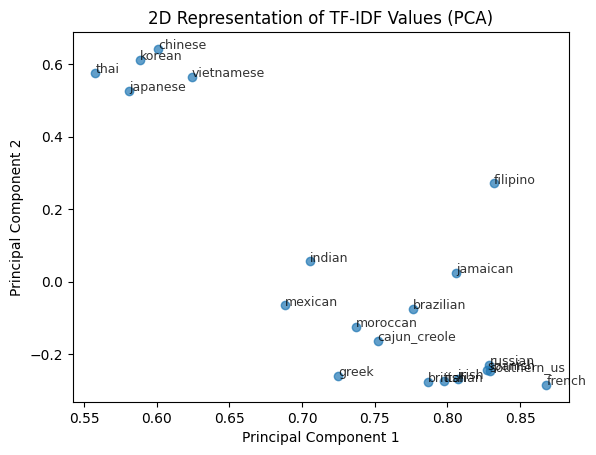

In [10]:
# Visualizing PCA results
import matplotlib.pyplot as plt

plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], alpha=0.7)

# Add cuisine names to each data point
for i, cuisine in enumerate(cuisine_names):  # cuisine_names is the list of cuisine names
    plt.text(reduced_matrix[i, 0], reduced_matrix[i, 1], cuisine, fontsize=9, alpha=0.8)

plt.title('2D Representation of TF-IDF Values (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### K-means Clustering

In [12]:
from sklearn.cluster import KMeans

# Create K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=18)

# Train the model
kmeans.fit(reduced_matrix)

# Predict cluster labels
labels = kmeans.labels_

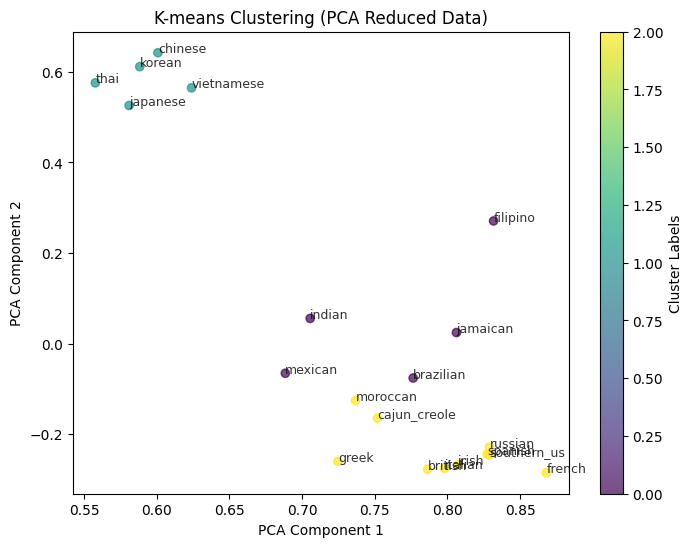

In [13]:
import matplotlib.pyplot as plt

# Visualizing clustering results
plt.figure(figsize=(8, 6))

# Visualizing each 100ster with a different color
scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Add cuisine names to each data point
for i, cuisine in enumerate(cuisine_names):  # cuisine_names is the list of cuisine names
    plt.text(reduced_matrix[i, 0], reduced_matrix[i, 1], cuisine, fontsize=9, alpha=0.8)

# Add a color bar for the clusters
plt.colorbar(scatter, label='Cluster Labels')  # Use color bar to display cluster labels

# Set labels and title
plt.title('K-means Clustering (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show;

In [14]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
score = silhouette_score(reduced_matrix, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6226426722138605


In [15]:
# Maximum silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 값들을 저장할 리스트
sil_scores = []
n_clusters_range = range(2, 11)  # 군집 개수 범위 (2부터 10까지)

# random_state 범위 설정
random_states = range(10, 101)

# 최적의 n_clusters와 random_state를 찾기 위한 변수 초기화
best_score = -1
best_n_clusters = None
best_random_state = None

# n_clusters와 random_state 값을 변경하며 실험
for n_clusters in n_clusters_range:
    for state in random_states:
        kmeans = KMeans(n_clusters=n_clusters, random_state=state)
        kmeans.fit(reduced_matrix)  # reduced_matrix는 PCA로 차원 축소된 데이터
        
        # silhouette score 계산
        score = silhouette_score(reduced_matrix, kmeans.labels_)
        
        # 최적의 score를 갱신
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters
            best_random_state = state

print(f"Best n_clusters: {best_n_clusters}")
print(f"Best random_state: {best_random_state}")
print(f"Best silhouette score: {best_score}")

Best n_clusters: 2
Best random_state: 10
Best silhouette score: 0.7536380682471424


In [16]:
# Maximum silhouette score when the number of clusters is fixed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 값들을 저장할 리스트
sil_scores = []
random_states = range(10, 101)  # random_state 값 범위 (예: 10에서 100까지)

# 반복하여 각 random_state에 대한 silhouette score 계산
for state in random_states:
    kmeans = KMeans(n_clusters=3, random_state=state)
    kmeans.fit(reduced_matrix)  # reduced_matrix는 PCA로 차원 축소된 데이터
    
    # silhouette score 계산
    score = silhouette_score(reduced_matrix, kmeans.labels_)
    sil_scores.append(score)

# 최적의 random_state 찾기
best_state = random_states[np.argmax(sil_scores)]
best_score = max(sil_scores)

print(f"Best random_state: {best_state}")
print(f"Best silhouette score: {best_score}")

Best random_state: 25
Best silhouette score: 0.6332995529355646


## 3. Apply ML Models

In [17]:
# Load the training dataset
with open('json_files/train_final.json', 'r') as train_file:
    train_data = json.load(train_file)

# Load the test dataset
with open('json_files/test_final.json', 'r') as test_file:
    test_data = json.load(test_file)

In [18]:
# Extract ingredients and labels for training data
training_corpus = [" ".join(recipe["ingredients"]) for recipe in train_data]
training_labels = [recipe["cuisine"] for recipe in train_data]

# Extract ingredients and labels for test data
test_corpus = [" ".join(recipe["ingredients"]) for recipe in test_data]
test_labels = [recipe["cuisine"] for recipe in test_data]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit on training data and transform both train and test datasets
X_train = tfidf.fit_transform(training_corpus)
X_test = tfidf.transform(test_corpus)

In [22]:
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality of TF-IDF features
n_components = 100  # Set the desired number of components
pca = TruncatedSVD(n_components=n_components, random_state=42)

# Transform the training and test datasets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
from sklearn.cluster import KMeans

# Apply K-means clustering
n_clusters = 5  # Set the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-means on the training data and predict clusters
train_clusters = kmeans.fit_predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

In [24]:
import scipy.sparse

# Add cluster assignments as features to the original PCA features
import numpy as np
X_train_with_clusters = np.hstack((X_train_pca, train_clusters[:, None]))
X_test_with_clusters = np.hstack((X_test_pca, test_clusters[:, None]))

In [26]:
# Assuming training_data is a list of dictionaries with "cuisine" and "ingredients"
y_train = [recipe["cuisine"] for recipe in train_data]
y_test = [recipe["cuisine"] for recipe in test_data]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_with_clusters, y_train)

# Predict on the test data
y_pred = model.predict(X_test_with_clusters)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7188364258058028

Classification Report:
               precision    recall  f1-score   support

   brazilian       0.54      0.22      0.32       467
     british       0.45      0.16      0.24       804
cajun_creole       0.76      0.64      0.70      1546
     chinese       0.75      0.82      0.78      2673
    filipino       0.64      0.41      0.50       755
      french       0.50      0.49      0.49      2646
       greek       0.78      0.59      0.67      1175
      indian       0.83      0.88      0.85      3003
       irish       0.52      0.28      0.37       667
     italian       0.71      0.87      0.78      7838
    jamaican       0.85      0.51      0.63       526
    japanese       0.74      0.60      0.66      1423
      korean       0.77      0.63      0.70       830
     mexican       0.87      0.90      0.89      6438
    moroccan       0.78      0.69      0.73       821
     russian       0.59      0.22      0.32       489
 southern_us       0.57    